In [75]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [76]:
img = cv2.imread('Celebrity face recognisation\Test\images (10).jpg')
img.shape

(224, 225, 3)

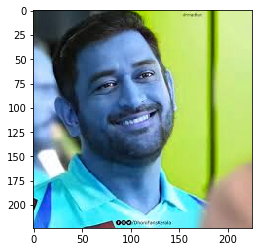

In [77]:
plt.imshow(img)

In [78]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(224, 225)

In [79]:
gray


array([[ 65,  54,  47, ..., 216, 216, 215],
       [ 65,  54,  47, ..., 216, 216, 215],
       [ 65,  54,  47, ..., 216, 216, 215],
       ...,
       [147, 146, 148, ..., 139, 139, 142],
       [147, 150, 151, ..., 137, 137, 141],
       [148, 154, 153, ..., 137, 137, 140]], dtype=uint8)

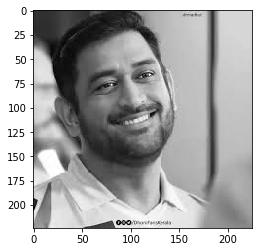

In [80]:
plt.imshow(gray, cmap='gray')

In [81]:
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [82]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [83]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces


array([[ 35,  23, 126, 126]])

In [84]:
eyes = eye_cascade.detectMultiScale(roi_gray)

In [85]:
(x,y,w,h) = faces[0]
x,y,w,h

(35, 23, 126, 126)

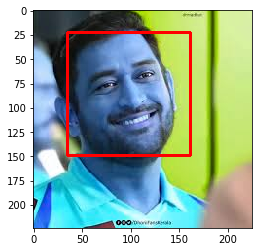

In [86]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

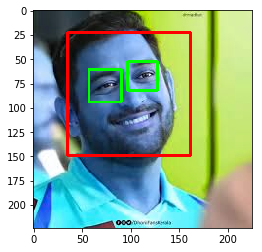

In [87]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

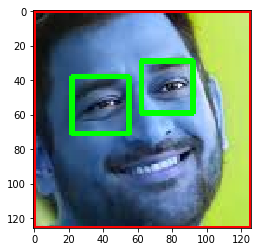

In [88]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [89]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

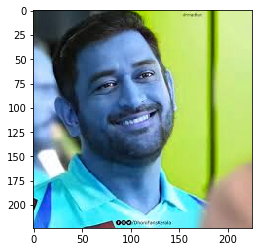

In [90]:
orginal_image = cv2.imread("Celebrity face recognisation\Test\images (10).jpg")
plt.imshow(orginal_image)

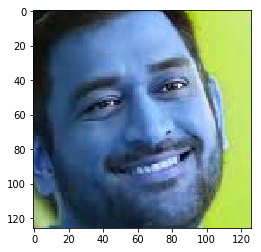

In [91]:
cropped_image = get_cropped_image_if_2_eyes('Celebrity face recognisation\Test\images (10).jpg')
plt.imshow(cropped_image)

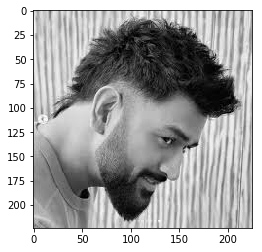

In [92]:
org_image_obstructed = cv2.imread('Celebrity face recognisation\Test\images (11).jpg')
plt.imshow(org_image_obstructed)

In [93]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('Celebrity face recognisation\Test\images (11).jpg')
cropped_image_no_2_eyes

In [94]:
path_to_data = "./Celebrity face recognisation/Celebrity Data/"
path_to_cr_data = "./Celebrity face recognisation/Celebrity Data/cropped/"

In [95]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [96]:
img_dirs

['./Celebrity face recognisation/Celebrity Data/cropped',
 './Celebrity face recognisation/Celebrity Data/Dhoni',
 './Celebrity face recognisation/Celebrity Data/Pawan Kalyan',
 './Celebrity face recognisation/Celebrity Data/Sharukh Khan',
 './Celebrity face recognisation/Celebrity Data/Sunil Chetri',
 './Celebrity face recognisation/Celebrity Data/Virat']

In [97]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [98]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

cropped
Dhoni
Generating cropped images in folder:  ./Celebrity face recognisation/Celebrity Data/cropped/Dhoni
Pawan Kalyan
Generating cropped images in folder:  ./Celebrity face recognisation/Celebrity Data/cropped/Pawan Kalyan
Sharukh Khan
Generating cropped images in folder:  ./Celebrity face recognisation/Celebrity Data/cropped/Sharukh Khan
Sunil Chetri
Generating cropped images in folder:  ./Celebrity face recognisation/Celebrity Data/cropped/Sunil Chetri
Virat
Generating cropped images in folder:  ./Celebrity face recognisation/Celebrity Data/cropped/Virat


In [99]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

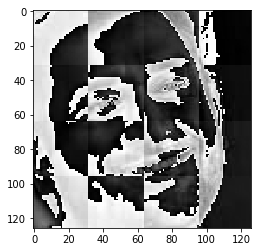

In [100]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [101]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Dhoni': ['./Celebrity face recognisation/Celebrity Data/cropped/Dhoni\\Dhoni1.png',
  './Celebrity face recognisation/Celebrity Data/cropped/Dhoni\\Dhoni10.png',
  './Celebrity face recognisation/Celebrity Data/cropped/Dhoni\\Dhoni11.png',
  './Celebrity face recognisation/Celebrity Data/cropped/Dhoni\\Dhoni12.png',
  './Celebrity face recognisation/Celebrity Data/cropped/Dhoni\\Dhoni13.png',
  './Celebrity face recognisation/Celebrity Data/cropped/Dhoni\\Dhoni14.png',
  './Celebrity face recognisation/Celebrity Data/cropped/Dhoni\\Dhoni15.png',
  './Celebrity face recognisation/Celebrity Data/cropped/Dhoni\\Dhoni16.png',
  './Celebrity face recognisation/Celebrity Data/cropped/Dhoni\\Dhoni17.png',
  './Celebrity face recognisation/Celebrity Data/cropped/Dhoni\\Dhoni18.png',
  './Celebrity face recognisation/Celebrity Data/cropped/Dhoni\\Dhoni19.png',
  './Celebrity face recognisation/Celebrity Data/cropped/Dhoni\\Dhoni2.png',
  './Celebrity face recognisation/Celebrity Data/cropped/

In [102]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Dhoni': 0,
 'Pawan Kalyan': 1,
 'Sharukh Khan': 2,
 'Sunil Chetri': 3,
 'Virat': 4}

In [103]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [104]:
len(X[0])

4096

In [105]:
32*32*3 + 32*32

4096

In [106]:
X[0]

array([[157],
       [168],
       [166],
       ...,
       [254],
       [  0],
       [  0]], dtype=uint8)

In [107]:
y[0]

0

In [108]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(251, 4096)

In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



In [110]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [111]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='multinomial', solver='newton-cg'), #logReg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [112]:

scores = []
best_estimators = {}
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    


In [113]:
best_estimators

{'svm': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=True, random_state=None, shrinking=True,
   tol=0.001, verbose=False))]), 'random_forest': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min...n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False))]), 'logistic_regression': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1, c

In [114]:
SVM = best_estimators['svm'].score(X_test,y_test)
Random_Forest = best_estimators['random_forest'].score(X_test,y_test)
Logistic_Regression = best_estimators['logistic_regression'].score(X_test,y_test)

In [116]:
print(SVM)
print(Random_Forest)
print(Logistic_Regression)

0.9295238095238095
0.7507936507936508
0.8060317460317461


In [117]:
best_clf = best_estimators['svm']

In [119]:
class_dict

{'Dhoni': 0,
 'Pawan Kalyan': 1,
 'Sharukh Khan': 2,
 'Sunil Chetri': 3,
 'Virat': 4}

In [120]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [121]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))